<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Carbin-Information" data-toc-modified-id="Carbin-Information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Carbin Information</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fare</a></span></li><li><span><a href="#Carbin-&amp;-Deck" data-toc-modified-id="Carbin-&amp;-Deck-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Carbin &amp; Deck</a></span></li></ul></li></ul></div>

[Data URL](https://www.kaggle.com/c/titanic/data)

In [1]:
import numpy as np 
import os
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
sns.set_style("whitegrid") 

In [4]:
train= pd.read_csv('../input/titanic/train.csv',encoding = 'utf-8')
test= pd.read_csv('../input/titanic/test.csv',encoding = 'utf-8')

# Feature Engineering

## Carbin Information

## Missing Values

detect missing data percentage

In [5]:
(train.isnull().sum() / len(train)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
train['Age'].mean()

29.69911764705882

In [9]:
test['Age'].mean()

30.272590361445783

In [10]:
train['Age'].groupby(train['Pclass']).mean()
#train['Age'].groupby(train['Pclass']).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
fill_mean = lambda g: g.fillna(g.mean())
train['Age']=train['Age'].groupby(train['Pclass']).apply(fill_mean)

## Fare

In [12]:
train['Fare'].groupby(train['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [13]:
train['Fare']=train['Fare'].groupby(train['Pclass']).apply(fill_mean)

## Carbin & Deck

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


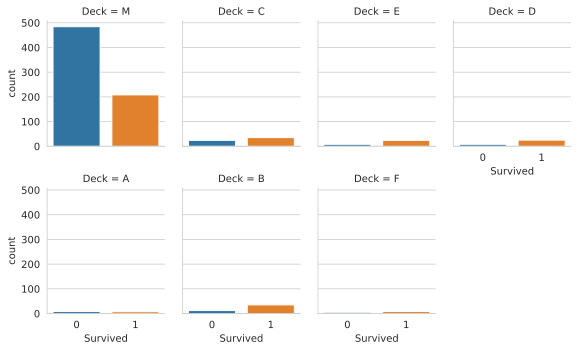

In [14]:
train['Deck']=train['Cabin'].str[0]
test['Deck']=test['Cabin'].str[0]
train['Deck'].fillna('M', inplace=True)
test['Deck'].fillna('M', inplace=True)
train['Deck'].replace(['G','T'],'M', inplace=True)
test['Deck'].replace(['G','T'],'M', inplace=True)
train['Deck'].unique()
test['Deck'].unique()
#train['Deck'].value_counts()
sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=train[train['Deck'].notnull()],
                    kind="count", size=2.5, aspect=.8)

[Text(0, 0.5, 'Fare'), Text(0.5, 0, 'Position')]

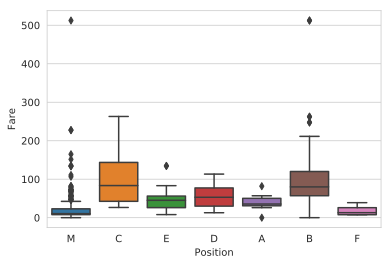

In [15]:
sns.boxplot(x="Deck", y="Fare", data=train).set(
    xlabel='Position', 
    ylabel='Fare')

In [16]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [17]:
train = convert_dummy(train,'Deck')
test = convert_dummy(test,'Deck')

In [18]:
train['Age'].groupby(train['Embarked']).mean()

Embarked
C    30.444992
Q    26.274382
S    29.288922
Name: Age, dtype: float64

In [19]:
test['Age'].groupby(test['Pclass']).mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [20]:
test['Age']=test['Age'].groupby(test['Pclass']).apply(fill_mean)
test['Fare']=test['Fare'].groupby(train['Pclass']).apply(fill_mean)

In [21]:
(test.isnull().sum() / len(test)) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          78.229665
Embarked        0.000000
Deck_A          0.000000
Deck_B          0.000000
Deck_C          0.000000
Deck_D          0.000000
Deck_E          0.000000
Deck_F          0.000000
dtype: float64

In [22]:
len(train)

891

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F'],
      dtype='object')

In [24]:
test['Fare'] = np.log1p(test['Fare'])
Y = train['Survived']
X = train.drop(['Survived','Name','PassengerId','Cabin','Ticket'],axis=1)
x_test = test.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [25]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F'],
      dtype='object')

In [26]:
X['Sex']=X['Sex'].replace(['female','male'],[0,1])
x_test['Sex']=x_test['Sex'].replace(['female','male'],[0,1])

In [27]:
X['Pclass'].value_counts() #Passenger's class (1st, 2nd, or 3rd)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
X = convert_dummy(X,'Pclass')
x_test = convert_dummy(x_test,'Pclass')

In [29]:
X['Age'].value_counts(bins=6,normalize=True,sort=False) #cut into bins

(0.339, 13.683]     0.079686
(13.683, 26.947]    0.430976
(26.947, 40.21]     0.320988
(40.21, 53.473]     0.112233
(53.473, 66.737]    0.048260
(66.737, 80.0]      0.007856
Name: Age, dtype: float64

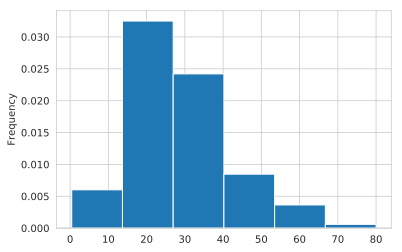

In [30]:
X['Age'].plot(kind='hist',bins=6,density=True)

In [31]:
X['SibSp'].value_counts() #Number of siblings/spouses aboard the Titanic

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
X.loc[X['SibSp'] > 0, 'SibSp'] = 1
x_test.loc[x_test['SibSp'] > 0, 'SibSp'] = 1

In [33]:
X['Parch'].value_counts() #Number of parents/children aboard the Titanic
#X['Parch']=X['Parch'].astype(int)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
X.loc[X['Parch'] > 0, 'Parch'] = 1
x_test.loc[x_test['Parch'] > 0, 'Parch'] = 1

In [35]:
X['Fare'].describe() #Fare paid for ticket

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

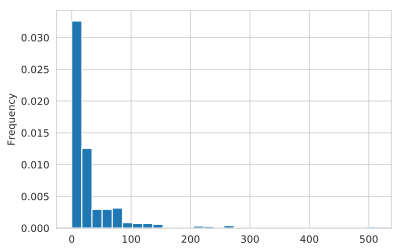

In [36]:
train['Fare'].plot(kind='hist',bins=30,density=True) 

In [37]:
X['Fare'] = np.log1p(X['Fare'])

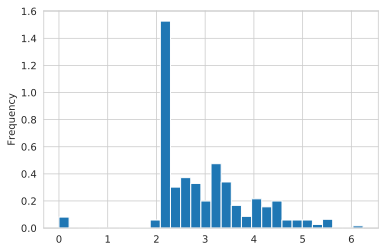

In [38]:
X['Fare'].plot(kind='hist',bins=30,density=True) 

In [39]:
X['Fare']=pd.cut(X['Fare'],4,labels=['1','2','3','4'])
x_test['Fare']=pd.cut(x_test['Fare'],4,labels=['1','2','3','4'])
X = convert_dummy(X,'Fare')
x_test = convert_dummy(x_test,'Fare')

In [40]:
X['Embarked'].value_counts() #Where the passenger got on the ship 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
X = convert_dummy(X,'Embarked')
x_test = convert_dummy(x_test,'Embarked')

In [42]:
#x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=0.3, random_state=0)

In [43]:
param_set = {
 'max_depth':range(10,14),
 'min_child_weight':range(1,3),
 'subsample':[i/10.0 for i in range(5,8)],
 'colsample_bytree':[i/10.0 for i in range(5,8)],
 'reg_alpha':[0.001],
 'gamma':[i/10.0 for i in range(6,7)]
}

In [44]:
model = xgb.XGBClassifier(n_estimators=50)
#gridcv = GridSearchCV(model,param_grid = param_set,cv=10)
#gridcv.fit(X, Y)

In [45]:
#gridcv.best_params_, gridcv.best_score_ 

`({'colsample_bytree': 0.7,
  'gamma': 0.4,
  'max_depth': 13,
  'min_child_weight': 3,
  'reg_alpha': 0.001,
  'subsample': 0.6},
 0.8417508417508418)`   
 
0.8473625140291807

In [46]:
#bestcv = gridcv.best_estimator_
bestfit = model.fit(X, Y)
test['Survived'] = bestfit.predict(x_test)
predY = bestfit.predict(X)

In [47]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,2.178064,NaN,Q,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,2.079442,NaN,S,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,2.369075,NaN,Q,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,2.268252,NaN,S,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,2.586824,NaN,S,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,2.202765,NaN,S,0,0,0,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,4.699571,C105,C,0,0,1,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,2.110213,NaN,S,0,0,0,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,2.202765,NaN,S,0,0,0,0,0,0,0


In [48]:
submission = test[['PassengerId','Survived']]
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
#submission.to_csv('C:/Users/xsong/Desktop/table/submission.csv',index = False)

[Text(0, 0.5, 'feature'),
 Text(0.5, 0, 'feature importance'),
 Text(0.5, 1.0, '')]

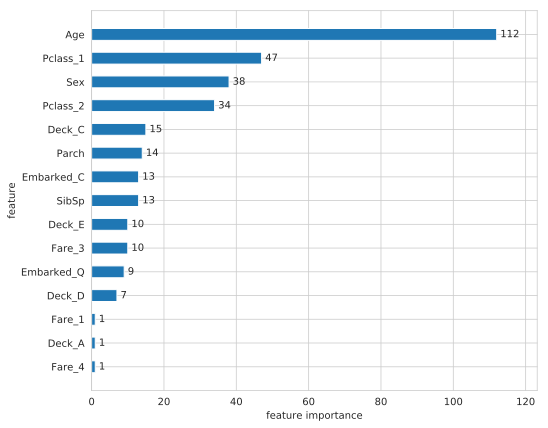

In [50]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(8,7))
plot_importance(bestfit,
                ax=ax,
                height=0.5,
                max_num_features=64).set(xlabel='feature importance',title='',
ylabel='feature')

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.92896175 0.07103825]
 [0.28654971 0.71345029]]


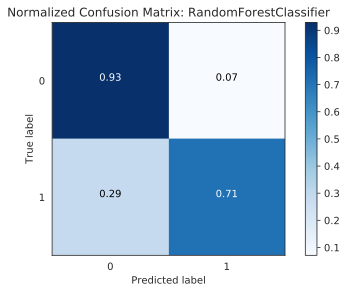

In [52]:
from sklearn.metrics import confusion_matrix

sns.set_style("white") 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(Y,predY),classes=class_names, normalize=True, 
                      title='Normalized Confusion Matrix: RandomForestClassifier')